# **Integral**
### (Riemann Sum - Divide And Conquer Method)

---

Anggota Kelompok:

*   Abizar Razak Aryakusuma
*   Diky Pribadi Santoso
*   Faisal Khalik Al Furqon
*   Ivan Septian
*   Wijoyo Raharjo Murti Indra Wahyono 

Masukan Integral (ex: 2*x + 3): 2*x + 3
Batas Bawah (a): 0
Batas Atas (b): 5
Masukan Jumlah Partisi (N): 4
Tipe (left, right, mid, trapezoid): right
Lebar Partisi 1:  2.5
Lebar Partisi 2:  2.5
Lebar Partisi 1:  1.25
Lebar Partisi 2:  1.25
Lebar Partisi 1:  1.25
Lebar Partisi 2:  1.25
Luas:  46.25


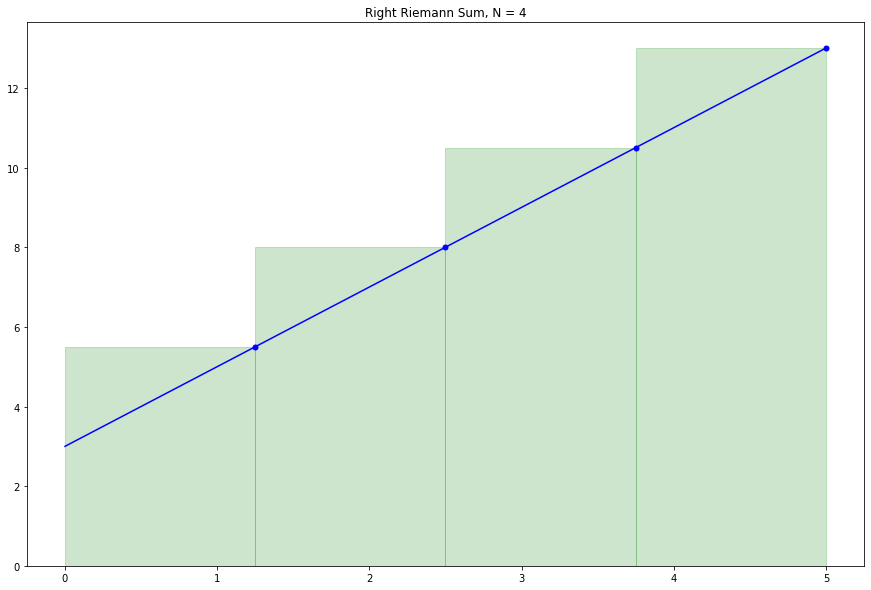

In [78]:
#import
import numpy as np
import matplotlib.pyplot as plt

def calculate_integral(typ, fx, a, b, n, w):
    # Jika lebar partisi sudah sesuai dengan yang diinginkan (batas atas - batas bawah <= lebar partisi)
    if (b-a <= w):
        # Kalkulasikan luas area sesuai dengan tipe
        # Left/Batas Bawah
        if typ == "left":
            return fx(a) * w
        # Mid/Nilai Tengah(Atas-Bawah/2)
        elif typ == "mid":
            return fx((a+b)/2) * w
        # Right/Batas Atas 
        elif typ == "right":
            return fx(b) * w
        # Trapesium 
        elif typ == "trapezoid":
            return (fx(a) + fx(b)) * w * 0.5
    # Jika lebar partisi masih besar
    else:
        # Membagi area partisi menjadi dua 
        # hingga lebar setiap partisi sesuai dengan lebar partisi untuk jumlah partisi yang diinginkan (n)
        # ex: rentang [0-16] menjadi 8 partisi maka setiap partisi akan memiliki lebar 2
        # aka lebar partisi akan dibagi dua hingga lebar setiap partisi mencapai 2
        # ex: iterasi 1 => partisi = 2, lebar = 8
        #     iterasi 2 => partisi = 4, lebar = 4
        #     iterasi 3 => partisi = 8, lebar = 2 -> sesuai
        n_1 = n//2
        n_2 = n - n_1
        
        # a dan b partisi 1
        a_1 = a
        b_1 = a + n_1 * w
        
        w1 = b_1 - a_1

        # a dan b partisi 2
        a_2 = b_1
        b_2 = b
        
        w2 = b_2 - a_2

        # Print N1 dan N2
        print("Lebar Partisi 1: ", w1)
        print("Lebar Partisi 2: ", w2)


        # Algoritma rekursif
        # Algoritma rekursif ini bertujuan untuk membagi partisi hingga lebar setiap partisi sesuai dengan yang diinginkan
        # Luas didapat dari penjumlahan nilai setiap partisi
        return calculate_integral(typ, fx, a_1, b_1, n_1, w) + calculate_integral(typ, fx, a_2, b_2, n_2, w)
        

def plotIntegral(typ, f, a, b, N):
    x = np.linspace(a,b,N+1) # nilai x untuk grafik
    y = f(x) # nilai y untuk grafik

    plt.figure(figsize=(15,10)) # ukuran grafik

    # Tampilkan grafik sesuai tipe
    if typ == "left":
        plt.plot(x,y,'b')
        x_left = x[:-1] # Left endpoints
        y_left = y[:-1]
        plt.plot(x_left,y_left,'b.',markersize=10)
        plt.bar(x_left,y_left,width=wid,alpha=0.2,align='edge',edgecolor='g', color='green')
        plt.title('Left Riemann Sum, N = {}'.format(N))
    elif typ == "mid":
        plt.plot(x,y,'b')
        x_mid = (x[:-1] + x[1:])/2 # Midpoints
        y_mid = f(x_mid)
        plt.plot(x_mid, y_mid,'b.',markersize=10)
        plt.bar(x_mid, y_mid, width=wid, alpha=0.2, edgecolor='g', color='green')
        plt.title('Midpoint Riemann Sum, N = {}'.format(N))
    elif typ == "right":
        plt.plot(x,y,'b')
        x_right = x[1:] # Right endpoints
        y_right = y[1:]
        plt.plot(x_right,y_right,'b.',markersize=10)
        plt.bar(x_right, y_right, width=-wid, alpha=0.2, align='edge', edgecolor='g', color='green')
        plt.title('Right Riemann Sum, N = {}'.format(N))
    elif typ == "trapezoid":    
        plt.plot(x,y,'b')
        for i in range(N):
            x_tr = [x[i],x[i],x[i+1],x[i+1]]
            y_tr = [0,f(x[i]),f(x[i+1]),0]
            plt.fill(x_tr, y_tr ,'b.', edgecolor='b', alpha=0.2, color='green')
        plt.title('Trapezoidal Rule, N = {}'.format(N))

    # Tampilkan grafik 
    plt.show()

# Main Program
integral_input = input("Masukan Integral (ex: 2*x + 3): ")
integral = eval("lambda x:" + integral_input) # ubah integral input (text) menjadi fungsi matematika
a = int(input("Batas Bawah (a): ")) # batas bawah
b = int(input("Batas Atas (b): ")) # batas atas
N = int(input("Masukan Jumlah Partisi (N): ")) # jumlah partisi
tipe = (input("Tipe (left, right, mid, trapezoid): ")) # metode riemann
wid = (b-a)/N # lebar partisi (dx)

# Print Luas
print("Luas: ", calculate_integral(tipe,integral,a,b,N,wid))
# Jalankan Fungsi plotIntegral untuk menampilkan grafik yang bersesuaian
plotIntegral(tipe, integral, a, b, N)